# Actividad Guiada 2 (Voy aplicar al 10/10)
# Wilmer Patricio Pujos Castro
#### Link GitHub Repository: https://github.com/patriciopujos/03MIAR---Algoritmos-de-Optimizacion/blob/7264d29f924649e6285009da0931bfae4ce97ae9/Algoritmos%20-%20Patricio%20Pujos%20-%20AG2.ipynb

Solución:  [-3.191516538097687e-16, 4.841924711886752e-16] 3.363001272853065e-31


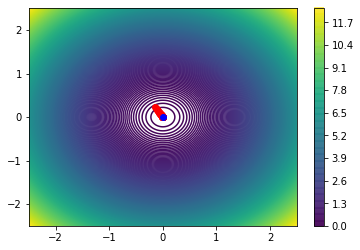

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt

#Función
f = lambda X : X[0]**2 + X[1]**2
df = lambda X : [2 * X[0] , 2 * X[1]]

#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 300
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[ix,iy] = f([x,y])

contour = plt.contour(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

#Generar punto de partida aleatorio
P = [random.uniform(-rango,rango), random.uniform(-rango,rango)]
plt.plot(P[0], P[1], "o", c = "red")
initial_TA = 0.05
#Radio de decaimiento
dec_ratio  = 0.75
#Numero de pasos
dec_steps = 100


for i in range(1000):
    grad = df(P)
    #Tasa de aprendizaje: ini_TA * radio ^ (paso/dec_steps)
    learning_rate = initial_TA * (dec_ratio ** (i/dec_steps))
    P[0], P[1] = P[0] - learning_rate*grad[0], P[1] - learning_rate*grad[1]
    plt.plot(P[0], P[1], "o", c = "red")

plt.plot(P[0], P[1], "o", c = "blue")
print("Solución: ", P, f(P))